In [ ]:
from google.colab import files
uploaded=files.upload()

Saving online_retail_customer_churn.csv to online_retail_customer_churn.csv


In [ ]:
!pip install warnings

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('online_retail_customer_churn.csv')

In [ ]:
data.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [ ]:
data.shape

(1000, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [ ]:
data.drop('Customer_ID',axis=1,inplace=True)

In [ ]:
data.shape

(1000, 14)

In [ ]:
data.describe()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [ ]:
data.isnull().any()

Age                           False
Gender                        False
Annual_Income                 False
Total_Spend                   False
Years_as_Customer             False
Num_of_Purchases              False
Average_Transaction_Amount    False
Num_of_Returns                False
Num_of_Support_Contacts       False
Satisfaction_Score            False
Last_Purchase_Days_Ago        False
Email_Opt_In                  False
Promotion_Response            False
Target_Churn                  False
dtype: bool

In [ ]:
data.duplicated().any()

False

In [ ]:
data.select_dtypes(include=['object']).columns

Index(['Gender', 'Promotion_Response'], dtype='object')

In [ ]:
data['Satisfaction_Score'].value_counts()

3    219
4    204
1    202
2    192
5    183
Name: Satisfaction_Score, dtype: int64

In [ ]:
data['Gender'].value_counts()

Female    342
Male      334
Other     324
Name: Gender, dtype: int64

In [ ]:
a=data['Email_Opt_In'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['Gender']=data['Gender'].replace({'Male':1,'Female':0,'Other':2})
data['Promotion_Response']=data['Promotion_Response'].replace({'Responded':1,'Ignored':0,'Unsubscribed':2})
data['Email_Opt_In']=data['Email_Opt_In'].replace({a[0]:1,a[1]:0})
data['Target_Churn']=data['Target_Churn'].replace({a[0]:1,a[1]:0})

In [ ]:
data.head()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1
1,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0
2,18,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1
3,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1
4,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0


In [ ]:
data['Num_of_Returns'].value_counts().sort_values(ascending=False)

5    116
8    110
9    108
2    103
0    102
7     99
4     95
6     92
1     88
3     87
Name: Num_of_Returns, dtype: int64

In [ ]:
data.columns

Index(['Age', 'Gender', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
       'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
       'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [ ]:
data['Num_of_Support_Contacts'].value_counts()

1    222
0    203
2    200
3    188
4    187
Name: Num_of_Support_Contacts, dtype: int64

In [ ]:
data['Target_Churn'].value_counts()

1    526
0    474
Name: Target_Churn, dtype: int64

In [ ]:
data['Promotion_Response'].value_counts()

2    361
1    338
0    301
Name: Promotion_Response, dtype: int64

In [ ]:
data.sample(3)

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
166,42,1,178.61,8689.05,7,42,68.54,5,0,4,201,1,2,0
968,34,0,78.18,9737.84,4,69,261.12,6,3,1,340,1,2,1
254,38,2,109.72,6864.38,6,23,487.78,4,3,4,6,1,2,1


<Axes: xlabel='Target_Churn', ylabel='Num_of_Returns'>

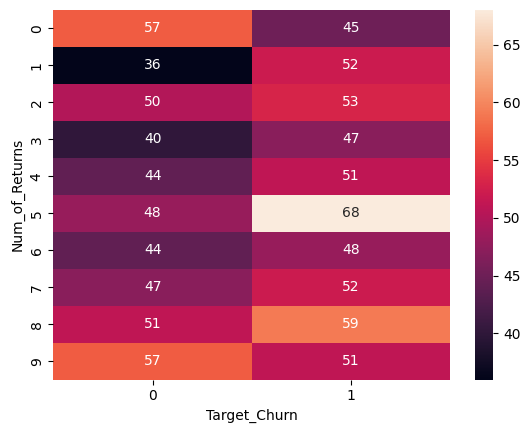

In [ ]:
a=pd.crosstab(data['Num_of_Returns'],data['Target_Churn'])
sns.heatmap(a,annot=True)

<Axes: xlabel='Target_Churn', ylabel='Satisfaction_Score'>

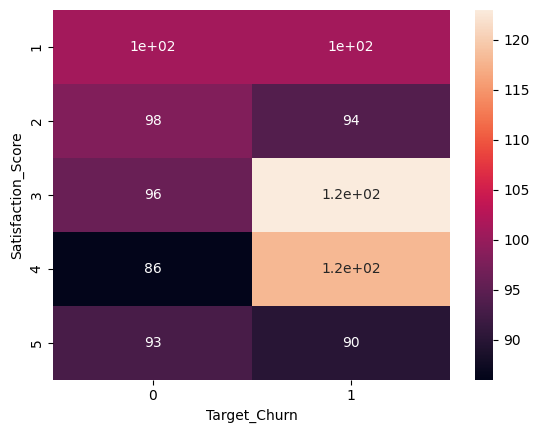

In [ ]:
b=pd.crosstab(data['Satisfaction_Score'],data['Target_Churn'])
sns.heatmap(b,annot=True)

In [ ]:
data[data['Target_Churn']==False]["Satisfaction_Score"].mean()

2.940928270042194

In [ ]:
data[data['Promotion_Response']=='Responded']['Target_Churn'].value_counts()

Series([], Name: Target_Churn, dtype: int64)

In [ ]:
data[data['Promotion_Response']=='Ignored']['Target_Churn'].value_counts()

Series([], Name: Target_Churn, dtype: int64)

In [ ]:
data.head(1)

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,2,45.15,5892.58,5,22,453.8,2,0,3,129,1,1,1


In [ ]:
data[data['Target_Churn']==True]['Total_Spend'].mean()

5158.620399239544

In [ ]:
data[data['Target_Churn']==False]['Total_Spend'].mean()

4994.426835443039

In [ ]:
data[data['Target_Churn']==True]['Annual_Income'].mean()

110.14178707224335

In [ ]:
data[data['Target_Churn']==False]['Annual_Income'].mean()

113.98392405063292

In [ ]:
grouped_data=data.groupby('Target_Churn')

In [ ]:
grouped_data['Average_Transaction_Amount'].mean()

Target_Churn
0    270.673776
1    263.454677
Name: Average_Transaction_Amount, dtype: float64

In [ ]:
grouped_data['Years_as_Customer'].mean()

Target_Churn
0    9.900844
1    9.570342
Name: Years_as_Customer, dtype: float64

In [ ]:
data['Num_of_Purchases'].max()

99

In [ ]:
data['Num_of_Purchases'].min()

1

In [ ]:
data['Num_of_Purchases'].mean()

49.456

In [ ]:
cont_variables=[]
categorical_variables=[]
for i in data.columns[:-1]:
  if len(data[i].unique())<=15:
    categorical_variables.append(i)
  else:
    cont_variables.append(i)

In [ ]:
cont_variables

['Age',
 'Annual_Income',
 'Total_Spend',
 'Years_as_Customer',
 'Num_of_Purchases',
 'Average_Transaction_Amount',
 'Last_Purchase_Days_Ago']

In [ ]:
categorical_variables

['Gender',
 'Num_of_Returns',
 'Num_of_Support_Contacts',
 'Satisfaction_Score',
 'Email_Opt_In',
 'Promotion_Response']

UNIVARIATE ANALYSIS

continuos

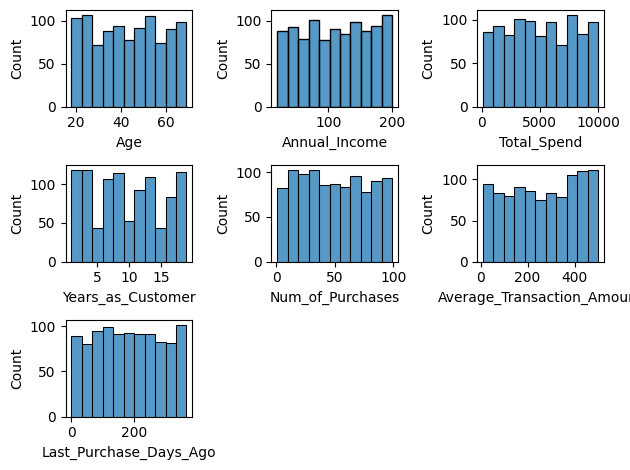

In [ ]:
cont_iterator=1
for i in cont_variables:
  plt.subplot(3,3,cont_iterator)
  sns.histplot(data[i])
  plt.tight_layout()
  cont_iterator+=1


<ipython-input-234-616fe117d79f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-234-616fe117d79f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-234-616fe117d79f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

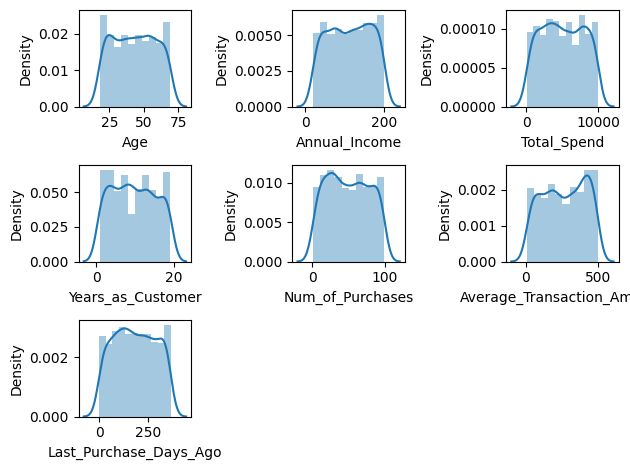

In [ ]:
cont_iterator=1
for i in cont_variables:
  plt.subplot(3,3,cont_iterator)
  sns.distplot(data[i])
  plt.tight_layout()
  cont_iterator+=1

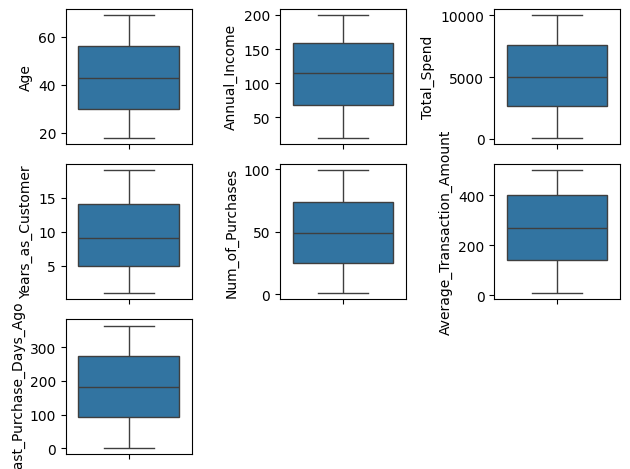

In [ ]:
cont_iterator=1
for i in cont_variables:
  plt.subplot(3,3,cont_iterator)
  sns.boxplot(data[i])
  plt.tight_layout()
  cont_iterator+=1


categorical

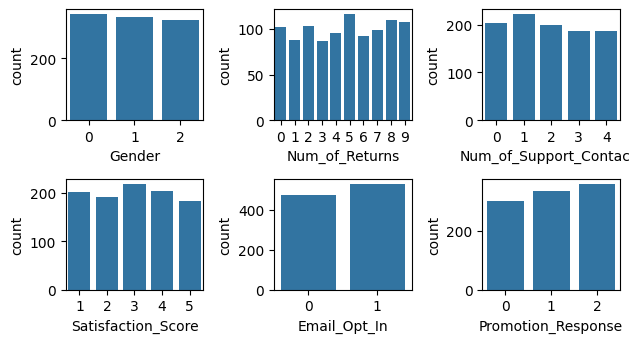

In [ ]:
categorical_iterator=1
for i in categorical_variables:
  plt.subplot(3,3,categorical_iterator)
  sns.countplot(x=data[i])
  plt.tight_layout()
  categorical_iterator+=1

BIVARIATE ANALYSIS

In [ ]:
cont_variables

['Age',
 'Annual_Income',
 'Total_Spend',
 'Years_as_Customer',
 'Num_of_Purchases',
 'Average_Transaction_Amount',
 'Last_Purchase_Days_Ago']

continuos

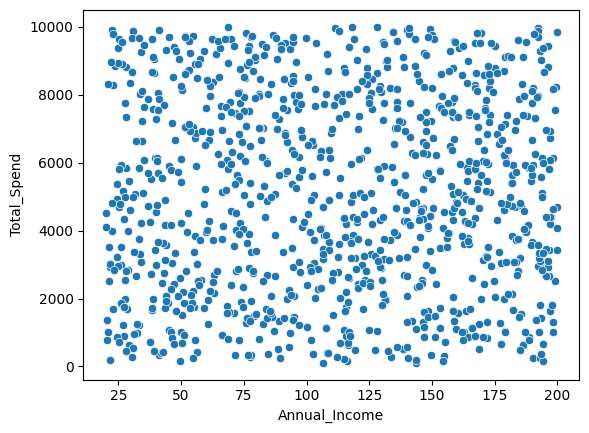

In [ ]:
sns.scatterplot(x=data['Annual_Income'],y=data['Total_Spend'])
plt.show()

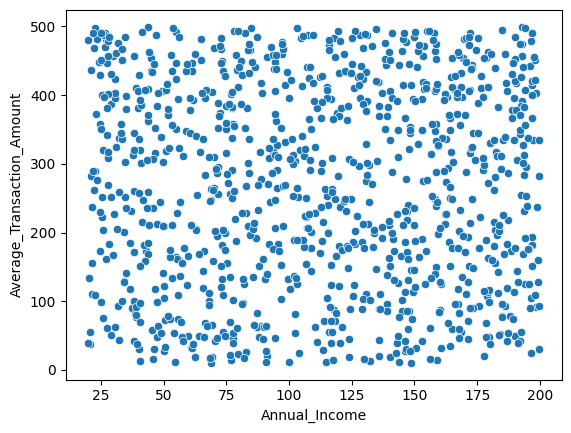

In [ ]:
sns.scatterplot(x=data['Annual_Income'],y=data['Average_Transaction_Amount'])
plt.show()

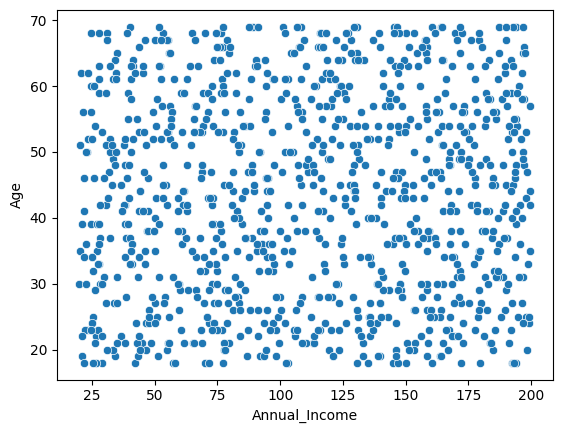

In [ ]:
sns.scatterplot(x=data['Annual_Income'],y=data['Age'])
plt.show()

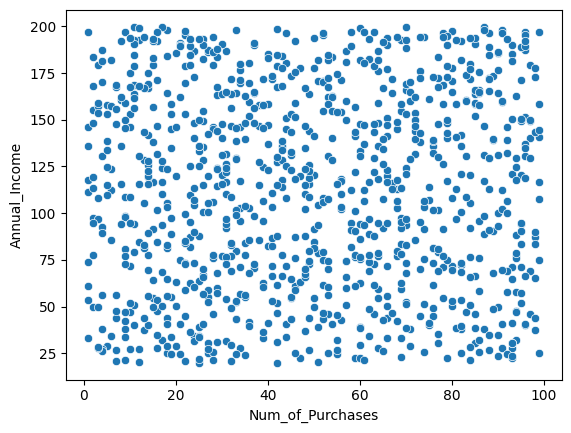

In [ ]:
sns.scatterplot(y=data['Annual_Income'],x=data['Num_of_Purchases'])
plt.show()

In [ ]:
categorical_variables

['Gender',
 'Num_of_Returns',
 'Num_of_Support_Contacts',
 'Satisfaction_Score',
 'Email_Opt_In',
 'Promotion_Response']

categorical vs categorical

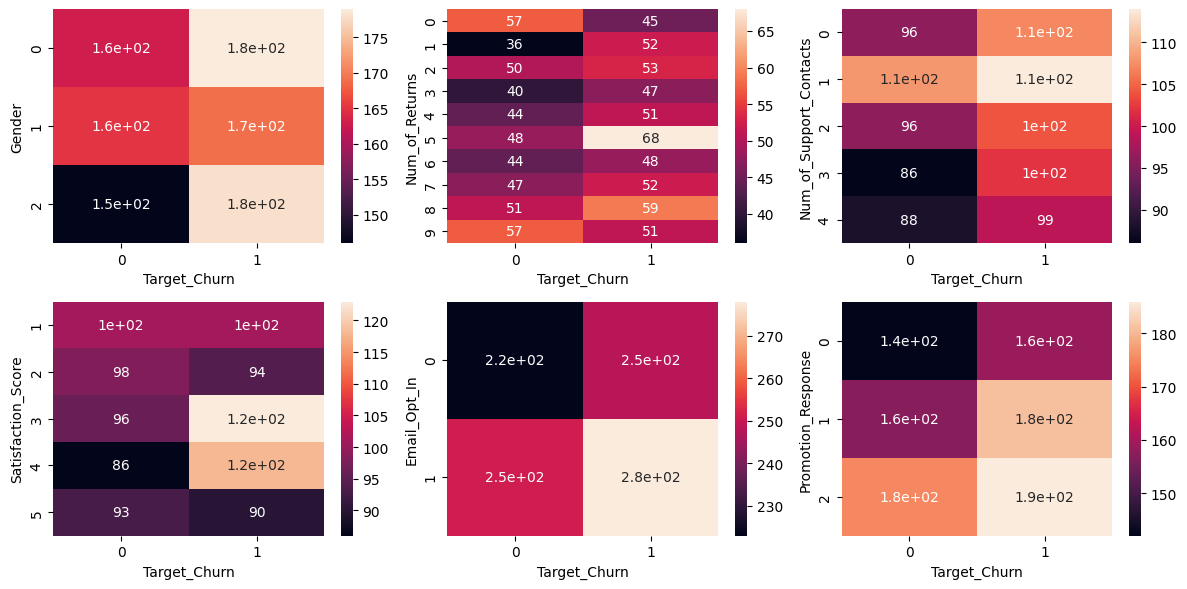

In [ ]:
c=1
plt.figure(figsize=(12,6))
for i in categorical_variables:
  plt.subplot(2,3,c)
  d=pd.crosstab(data[i],data['Target_Churn'])
  sns.heatmap(d,annot=True)
  plt.tight_layout()
  c+=1

continuos vs categorical

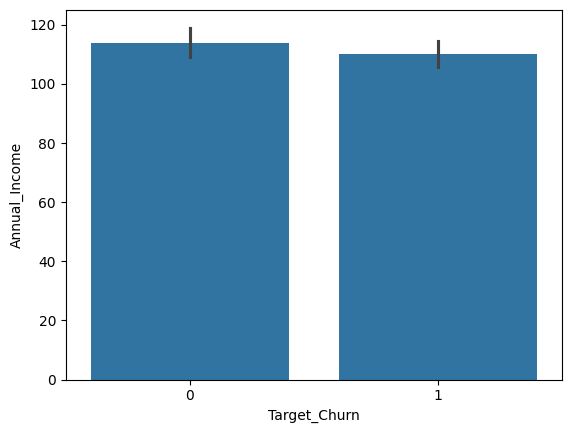

In [ ]:
sns.barplot(x=data['Target_Churn'],y=data['Annual_Income'])
plt.show()

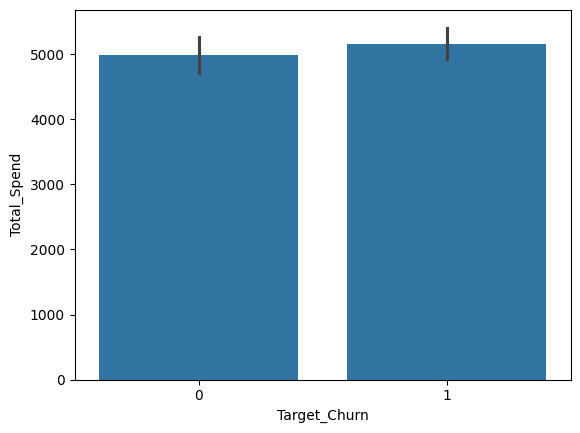

In [ ]:
sns.barplot(x=data['Target_Churn'],y=data['Total_Spend'])
plt.show()

In [ ]:
data.tail()

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
995,54,1,143.72,1089.09,2,29,77.75,0,3,2,88,1,0,0
996,19,1,164.19,3700.24,9,90,34.45,6,4,4,352,0,1,1
997,47,0,113.31,705.85,17,69,187.37,7,3,1,172,1,2,0
998,23,1,72.98,3891.60,7,31,483.80,1,2,5,55,0,1,1
999,34,2,134.86,3956.71,15,48,420.91,6,0,1,269,1,0,1


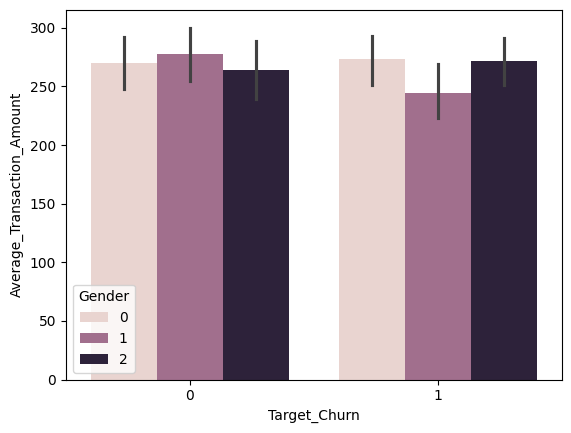

In [ ]:
sns.barplot(x=data['Target_Churn'],y=data['Average_Transaction_Amount'],hue=data['Gender'])
plt.show()

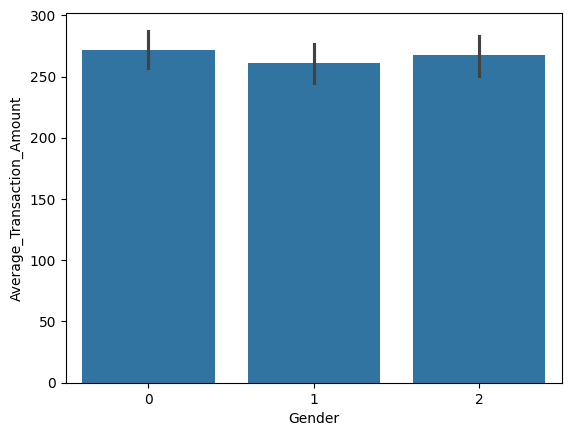

In [ ]:
sns.barplot(x=data['Gender'],y=data['Average_Transaction_Amount'])
plt.show()

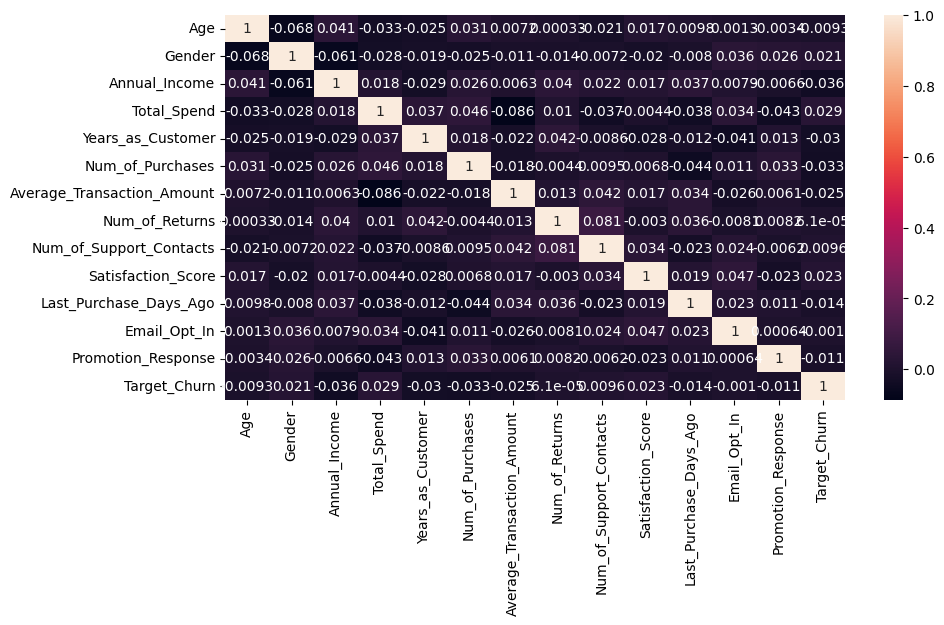

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
x=data.drop('Target_Churn',axis=1)
y=data['Target_Churn']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
lr_model=LogisticRegression()
svc_model=SVC(kernel='rbf')
rf_model=RandomForestClassifier()
xgb_model=XGBClassifier()

In [ ]:
model_scores={}
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
models=[lr_model,svc_model,rf_model,xgb_model]
for model in models:
  model_scores[model]=cross_val_score(model,x,y,cv=kfold,scoring='accuracy').mean()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
model_scores

{LogisticRegression(): 0.51,
 SVC(): 0.514,
 RandomForestClassifier(): 0.483,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...): 0.527}

lr-model_accuracy -------51%
svc_mode_model_accuracy-----51.4%
rf_model_accuracy-------48.3%
xgb_model_accuracy-------52.7%

I got very low accuracy for all models.the reason i think for this is there is very very correlation between features